**Objective:**

The objective of this assignment is to introduce to various clustering algorithms, including K-Means, hierarchical, and DBSCAN, and provide hands-on experience in applying these techniques to a real-world dataset.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
description = pd.read_excel('/content/EastWestAirlines.xlsx', sheet_name = 'Description')
data_airlines = pd.read_excel('/content/EastWestAirlines.xlsx', sheet_name = 'data')

In [ ]:
description

,East-West Airlines is trying to learn more about its customers. Key issues are their,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,"flying patterns, earning and use of frequent f...",NaN,NaN,NaN,NaN
1,card. The task is to identify customer segmen...,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,Source: Based upon real business data; company...,NaN,NaN,NaN,NaN
5,(c) 2016 Galit Shmueli and Peter Bruce,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN
8,Field Name,Data Type,Max Data Length,Raw Data or Telcom Created Field?,Description
9,ID#,NUMBER,NaN,Telcom,Unique ID


**Data Preprocessing:**

* Preprocess the dataset to handle missing values, remove outliers, and scale the features if necessary.
* Perform exploratory data analysis (EDA) to gain insights into the distribution of data and identify potential clusters.
* Use multiple visualizations to understand the hidden patterns in the dataset

In [ ]:
data_airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


All the columns are of numerical data type and there are no missing entries.

In [ ]:
data_airlines.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [ ]:
data_airlines[data_airlines.duplicated()]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?


No duplicates detected in the dataset.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sea

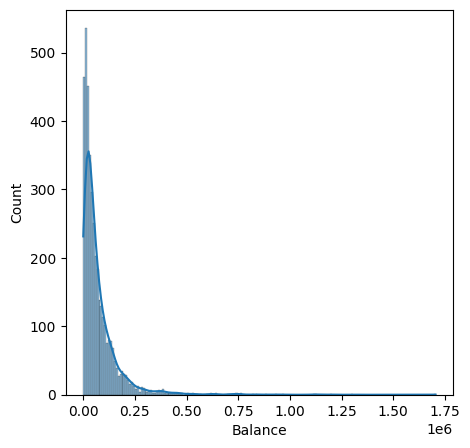

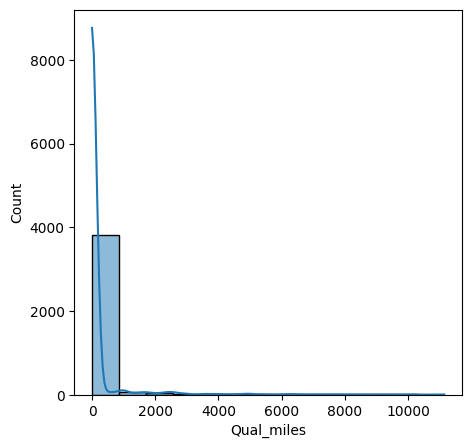

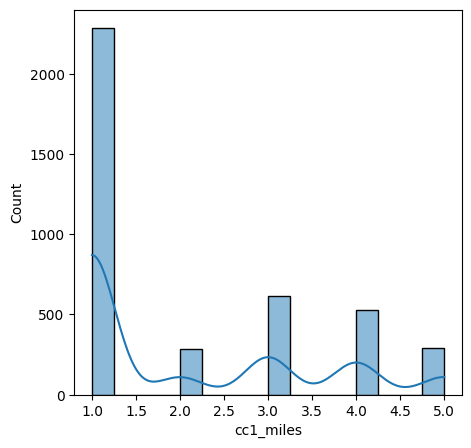

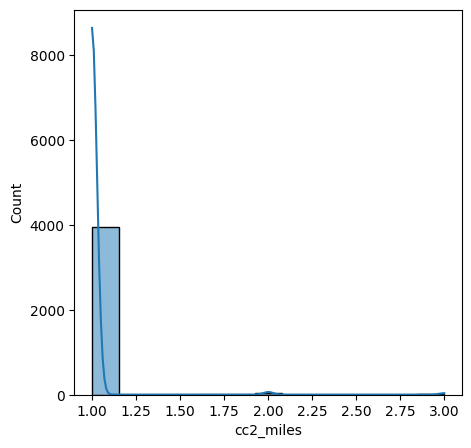

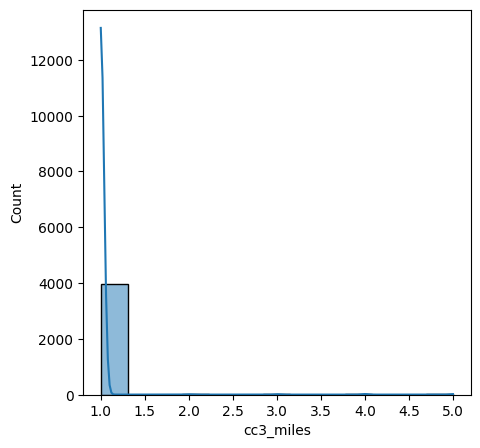

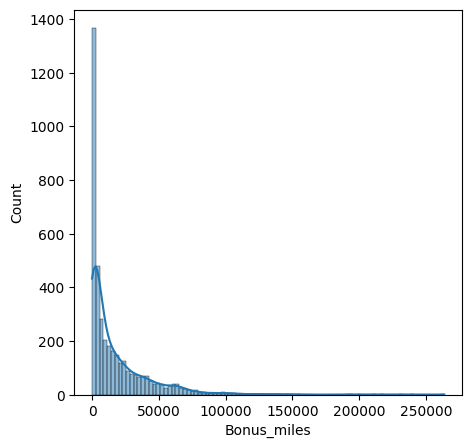

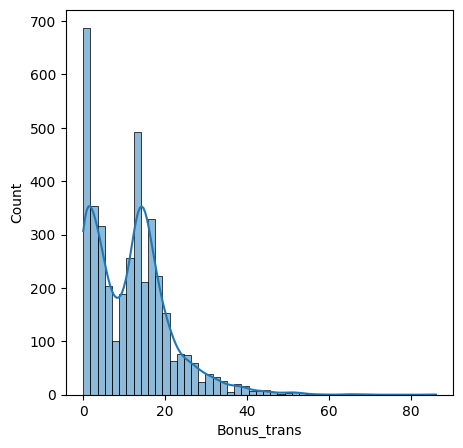

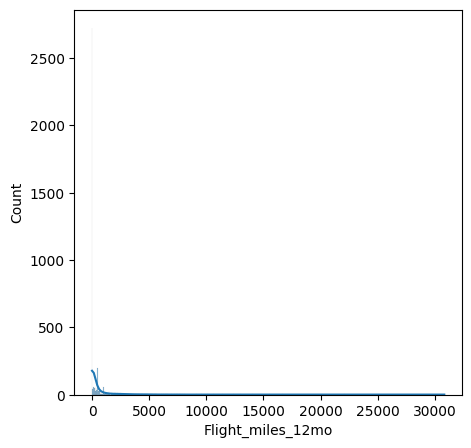

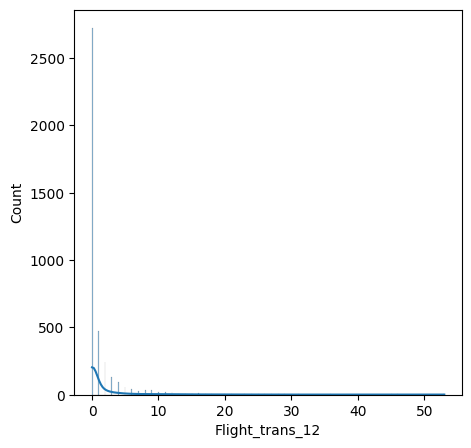

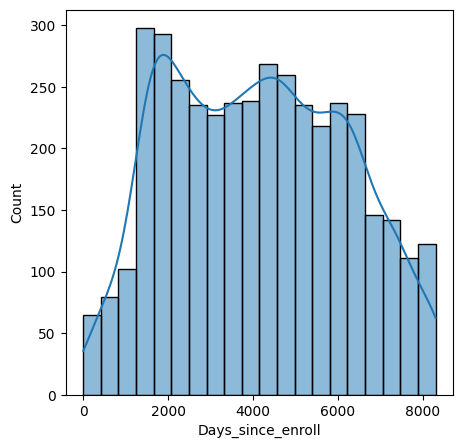

In [ ]:
for c in data_airlines.columns:
  if c != 'ID#' and c != 'Award?':
    plt.figure(figsize=(5,5))
    sea.histplot(data_airlines[c], kde=True)
    plt.show()

In [ ]:
# Segregating columns
x_data = data_airlines.drop(['ID#', 'Award?'], axis=1)
y_data = data_airlines['Award?']
print(x_data.head(5))
print('\nx shape :', x_data.shape, 'y shape :', y_data.shape)

   Balance  Qual_miles  ...  Flight_trans_12  Days_since_enroll
0    28143           0  ...                0               7000
1    19244           0  ...                0               6968
2    41354           0  ...                0               7034
3    14776           0  ...                0               6952
4    97752           0  ...                4               6935

[5 rows x 10 columns]

x shape : (3999, 10) y shape : (3999,)


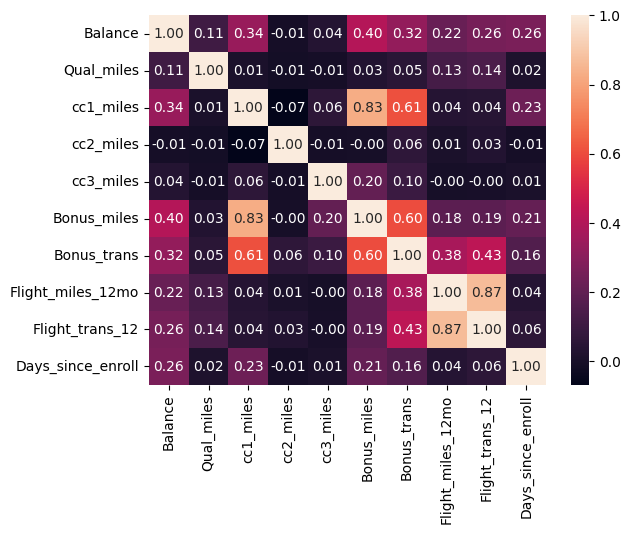

In [ ]:
corr = x_data.corr()
sea.heatmap(corr, annot=True, fmt = '.2f')
plt.show()

A few variables are highly correlated like

* Number of flight miles in the past 12 months and Number of flight transactions in the past 12 months. Perhaps it is logical because only if passengers are travelling then they can do flight transactions.

* Number of miles earned with freq. flyer credit card in the past 12 months and Number of miles earned from non-flight bonus transactions in the past 12 months. Perpahs similar reasoning like that of the earlier can be made to this correlation too.

**Implementing Clustering Algorithms**

* Implement the K-Means, hierarchical, and DBSCAN algorithms using a programming language such as Python with libraries like scikit-learn or MATLAB.
* Apply each clustering algorithm to the pre-processed dataset to identify clusters within the data.
* Experiment with different parameter settings for hierarchical clustering (e.g., linkage criteria), K-means (Elbow curve for different K values) and DBSCAN (e.g., epsilon, minPts) and evaluate the clustering results.

**K-means Clustering**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

Building a model without including the 'dependent' variable Awards.

In [ ]:
# Scalar scaling the data excluding ID's and Awards
std_scaler = StandardScaler()
x_data_scaled = std_scaler.fit_transform(x_data)
x_data_scaled

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.39545434e+00],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.37995704e+00],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.41192021e+00],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31560393e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
         2.85309024e-02, -9.85033311e-02, -1.31608822e+00],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31754109e+00]])

[39990.00000000001, 32088.27969959081, 27559.9368755185, 24100.972327769676, 21475.521086772493, 21022.87892689744, 19766.51952442905, 15859.481533259146, 15406.839373384099, 12806.189356080557, 11713.772654684708, 11023.661698424869, 10545.702576305444, 10186.88856690622, 9940.935691619707, 9662.733596577837, 9333.476223708225, 9025.773463824886, 8770.917605251514, 8571.204589030121]


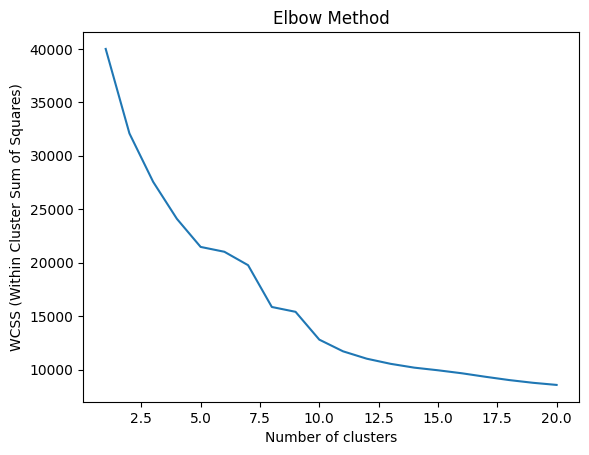

In [ ]:
# How to find optimum number of  cluster
# The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares (Wcss) criterion:

wcss = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(x_data_scaled)
    wcss.append(kmeans.inertia_)

print(wcss)

plt.plot(range(1, 21), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Within Cluster Sum of Squares)')
plt.show()

Based on the WCSS vs Number of clusters plot (Elbow method) the 1st elbow is at k = 2.

In [ ]:
# Building a unsupervised Kmeans model with 2, 5, 8, and 10 clusters.
model_kmeans_01 = KMeans(n_clusters = 2, random_state = 42)
model_kmeans_01.fit(x_data_scaled)

model_kmeans_02 = KMeans(n_clusters = 5, random_state = 42)
model_kmeans_02.fit(x_data_scaled)

model_kmeans_03 = KMeans(n_clusters = 8, random_state = 42)
model_kmeans_03.fit(x_data_scaled)

model_kmeans_04 = KMeans(n_clusters = 10, random_state = 42)
model_kmeans_04.fit(x_data_scaled)

KMeans(n_clusters=10, random_state=42)

In [ ]:
# Assigning clusterID to each enrty
data_airlines['cluster_mk01'] = model_kmeans_01.labels_
data_airlines['cluster_mk02'] = model_kmeans_02.labels_
data_airlines['cluster_mk03'] = model_kmeans_03.labels_
data_airlines['cluster_mk04'] = model_kmeans_04.labels_
data_airlines.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster_mk01,cluster_mk02,cluster_mk03,cluster_mk04
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,0,7,7
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,0,7,7
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,0,7,7
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0,0,7,7
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1,1,1,4


In [ ]:
# Count of entries in each cluster
print(data_airlines.cluster_mk01.value_counts())
print(data_airlines.cluster_mk02.value_counts())
print(data_airlines.cluster_mk03.value_counts())
print(data_airlines.cluster_mk04.value_counts())

cluster_mk01
0    2793
1    1206
Name: count, dtype: int64
cluster_mk02
0    2146
3    1239
1     451
2     148
4      15
Name: count, dtype: int64
cluster_mk03
2    1280
4    1109
7    1067
1     313
3     112
0      60
6      43
5      15
Name: count, dtype: int64
cluster_mk04
2    1123
7    1019
4     648
8     624
1     320
3     105
0      58
9      44
6      43
5      15
Name: count, dtype: int64


**Evaluation and Performance Metrics**

* Evaluate the quality of clustering using internal evaluation metrics such as silhouette score for K-Means and DBSCAN.

In [ ]:
# Some key metrics to evaluate the models
from sklearn.metrics import silhouette_score, davies_bouldin_score

model_kmeans_01_silh_score = silhouette_score(x_data_scaled, model_kmeans_01.labels_)
print('2cluster \nSilhouette Score mk01:', model_kmeans_01_silh_score)
model_kmeans_01_davies_bouldin_score = davies_bouldin_score(x_data_scaled, model_kmeans_01.labels_)
print('Davies Bouldin Score mk01:', model_kmeans_01_davies_bouldin_score)

model_kmeans_02_silh_score = silhouette_score(x_data_scaled, model_kmeans_02.labels_)
print('\n5 clusters \nSilhouette Score mk02:', model_kmeans_02_silh_score)
model_kmeans_02_davies_bouldin_score = davies_bouldin_score(x_data_scaled, model_kmeans_02.labels_)
print('Davies Bouldin Score mk02:', model_kmeans_02_davies_bouldin_score)

model_kmeans_03_silh_score = silhouette_score(x_data_scaled, model_kmeans_03.labels_)
print('\n8 clusters \nSilhouette Score mk03:', model_kmeans_03_silh_score)
model_kmeans_03_davies_bouldin_score = davies_bouldin_score(x_data_scaled, model_kmeans_03.labels_)
print('Davies Bouldin Score mk03:', model_kmeans_03_davies_bouldin_score)

model_kmeans_04_silh_score = silhouette_score(x_data_scaled, model_kmeans_04.labels_)
print('\n10 clusters \nSilhouette Score mk04:', model_kmeans_04_silh_score)
model_kmeans_04_davies_bouldin_score = davies_bouldin_score(x_data_scaled, model_kmeans_04.labels_)
print('Davies Bouldin Score mk04:', model_kmeans_04_davies_bouldin_score)

2cluster 
Silhouette Score mk01: 0.35826638416515033
Davies Bouldin Score mk01: 1.520260959742562

5 clusters 
Silhouette Score mk02: 0.27453067999744063
Davies Bouldin Score mk02: 1.3222331191107282

8 clusters 
Silhouette Score mk03: 0.2691143284691443
Davies Bouldin Score mk03: 1.0924997808770365

10 clusters 
Silhouette Score mk04: 0.260895358070862
Davies Bouldin Score mk04: 1.1013090959053042


Silhouette Score measures cluster members cohesion and seperation distance between other cluster, and Davies Bouldin Score measures average distance between data points and their centroid and distance between centroids.

The Silhouette score decreases with increasing number of clusters, whereas Davies Bouldin score reduces with increasing number of clusters. This seems confusing as former score indicates that fewer clusters (2) is good and on the other hand the later score suggests increasing number of clusters is good. This contradiction stems because Silhouette penalizes more clusters and Davies Bouldin awards separation.

One more type of measurement is computing means of variables based on clusterIDs.

**Cluster Analysis and Interpretation**

* Analyse the clusters generated by each clustering algorithm and interpret the characteristics of each cluster. Write you insights in few comments.

In [ ]:
# Mean of clusters for every variable
print('2 clusters')
print(x_data.groupby(model_kmeans_01.labels_).mean())
award_rates_mk01 = data_airlines.groupby('cluster_mk01')['Award?'].mean()
print('\nAward rate %', award_rates_mk01 * 100)

2 clusters
         Balance  Qual_miles  ...  Flight_trans_12  Days_since_enroll
0   44300.625492   93.080559  ...         0.664518        3729.282492
1  141459.421227  262.305141  ...         3.015755        5020.093698

[2 rows x 10 columns]

Award rate % cluster_mk01
0    25.886144
1    62.852405
Name: Award?, dtype: float64


All the mean values are higher for cluster1 and so award rate reflects the same that there are about 62% customers who have been awarded. Additionally, Silhouette score is the highest among 4 models and so is the case with DB score. Therefore, it may indicate poor clustering.

In [ ]:
print('\n5 clusters')
print(x_data.groupby(model_kmeans_02.labels_).mean())
award_rates_mk02 = data_airlines.groupby('cluster_mk02')['Award?'].mean()
print('\nAward rate %', award_rates_mk02 * 100)


5 clusters
         Balance  Qual_miles  ...  Flight_trans_12  Days_since_enroll
0   40939.164026  109.089003  ...         0.669618        3625.870457
1  195731.598670  233.678492  ...         1.649667        5319.372506
2  178736.263514  808.236486  ...        16.574324        4624.939189
3   72378.873285   93.639225  ...         0.673931        4468.333333
4  138061.400000   78.800000  ...         1.600000        4613.866667

[5 rows x 10 columns]

Award rate % cluster_mk02
0    22.134203
1    65.188470
2    77.027027
3    47.619048
4    53.333333
Name: Award?, dtype: float64


The cluster with higher mean values among several variables have customers with most awards. The Silhouette score drops down marginally but DB score is better whoch could indicate structured clusters.

In [ ]:
print('\n 8 clusters')
print(x_data.groupby(model_kmeans_03.labels_).mean())
award_rates_mk03 = data_airlines.groupby('cluster_mk03')['Award?'].mean()
print('\nAward rate %', award_rates_mk03 * 100)


 8 clusters
         Balance   Qual_miles  ...  Flight_trans_12  Days_since_enroll
0  117032.483333  5399.616667  ...         2.833333        3878.683333
1  236188.881789    97.019169  ...         2.162939        5642.019169
2   33404.589844    39.843750  ...         0.575781        2140.532031
3  166050.562500   514.642857  ...        18.357143        4444.705357
4   77436.227232    38.720469  ...         0.717764        4382.033363
5  138061.400000    78.800000  ...         1.600000        4613.866667
6   68876.581395    23.255814  ...         2.209302        3968.930233
7   57279.955014    63.924086  ...         0.879100        5749.026242

[8 rows x 10 columns]

Award rate % cluster_mk03
0    53.333333
1    70.607029
2    18.906250
3    77.678571
4    50.856628
5    53.333333
6    39.534884
7    29.053421
Name: Award?, dtype: float64


Cluster wise mean follow the logic similar to that of earlier models, where several variables have higher values more customers have received awards. In addition, Silhouette score decreases a bit more but DB score suggests more structured clusters.

In [ ]:
print('\n 10 clusters')
print(x_data.groupby(model_kmeans_04.labels_).mean())
award_rates_mk04 = data_airlines.groupby('cluster_mk04')['Award?'].mean()
print('\nAward rate %', award_rates_mk04 * 100)


 10 clusters
         Balance   Qual_miles  ...  Flight_trans_12  Days_since_enroll
0  118307.913793  5491.982759  ...         2.913793        3910.862069
1  156115.443750    91.046875  ...         1.796875        5065.781250
2   32220.057881    35.811220  ...         0.585040        2151.661621
3  132979.628571   476.895238  ...        18.552381        4338.352381
4   90511.064815    43.456790  ...         0.734568        5768.472222
5  138061.400000    78.800000  ...         1.600000        4613.866667
6   68876.581395    23.255814  ...         2.209302        3968.930233
7   55051.186457    61.170756  ...         0.852797        5755.501472
8   60198.708333    46.947115  ...         0.706731        2617.552885
9  682317.840909   372.363636  ...         5.431818        6235.113636

[10 rows x 10 columns]

Award rate % cluster_mk04
0    53.448276
1    69.687500
2    17.364203
3    76.190476
4    52.160494
5    53.333333
6    39.534884
7    28.753680
8    41.666667
9    81.818182
Name

Similar reasoning mentioned earlier with reference to more customers with awards and clusters with higher mean can be made to this model as well. The scores are stabilizing which may indicate overfitting.

To understand more about clusters and compare models, visualization will be helpful and hence PCA and tSNE must be performed.

**Visualization**

* Visualize the clustering results using scatter plots or other suitable visualization techniques.
* Plot the clusters with different colours to visualize the separation of data points belonging to different clusters.

In [ ]:
# To visualize clusters and compare models with k = 5 and k = 8
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

pca = PCA(n_components=2)
pca_x_data_scaled = pca.fit_transform(x_data_scaled)
print('PCA\n', pca_x_data_scaled)

tsne = TSNE(n_components=2)
tsne_x_data_scaled = tsne.fit_transform(x_data_scaled)
print('\ntSNE\n', tsne_x_data_scaled)

PCA
 [[-1.30259849 -0.06672133]
 [-1.28625898 -0.06339178]
 [-1.0325221  -0.13688067]
 ...
 [-0.23455655 -0.57857909]
 [-1.52141921  0.72682723]
 [-1.96207193  0.40994447]]

tSNE
 [[-41.3762   -33.018536]
 [-42.82117  -34.555202]
 [-31.25202  -30.69842 ]
 ...
 [ 45.022434 -40.92202 ]
 [-13.960131  27.2665  ]
 [-40.64404   39.5345  ]]


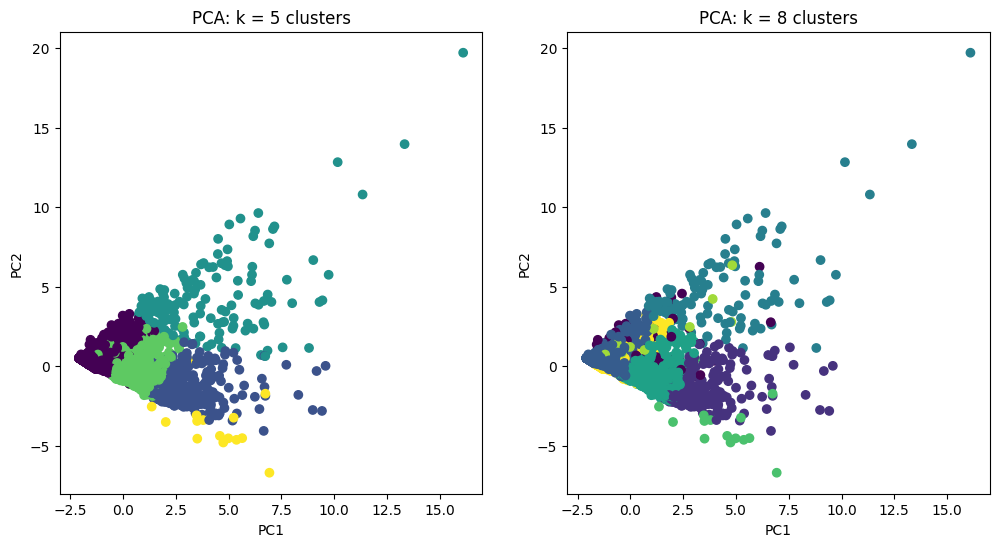

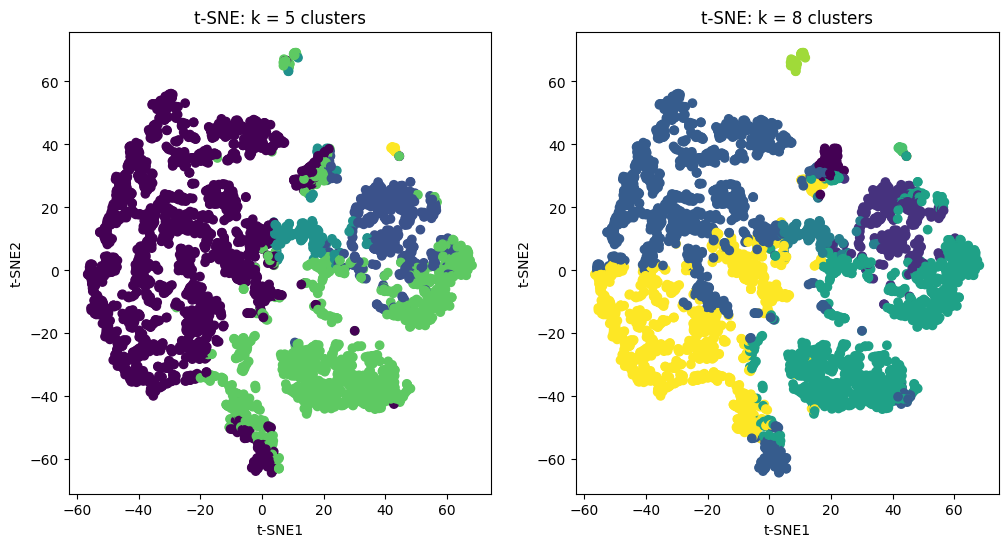

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(pca_x_data_scaled[:, 0], pca_x_data_scaled[:, 1], c = model_kmeans_02.labels_, cmap='viridis')
plt.title('PCA: k = 5 clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.subplot(1, 2, 2)
plt.scatter(pca_x_data_scaled[:, 0], pca_x_data_scaled[:, 1], c = model_kmeans_03.labels_, cmap='viridis')
plt.title('PCA: k = 8 clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(tsne_x_data_scaled[:, 0], tsne_x_data_scaled[:, 1], c = model_kmeans_02.labels_, cmap='viridis')
plt.title('t-SNE: k = 5 clusters')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')

plt.subplot(1, 2, 2)
plt.scatter(tsne_x_data_scaled[:, 0], tsne_x_data_scaled[:, 1], c = model_kmeans_03.labels_, cmap='viridis')
plt.title('t-SNE: k = 8 clusters')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')


plt.show()

PCA: Principle Component Analysis liniearly projects the data (all variables) to n_components (2 in this case) while preserving maximum variance.

tSNE: t-distributed Stochastic Neighbor Embedding projects data (all variables) non-linearly.

Both these techniques are used to reduce dimentionality, meaning in this case there are 10 variables by using PCA or tSNE (linear or non-linear) these variables can be represented in two components (n_components = 2). This menthod helps is visually identifying clusters.

For k = 5, model_kmeans_02, PCA shows clear seperation of clusters compared with k = 8, model_kmeans_03. On the other hand t-SNE plot shows clear groupings for k = 5, model_kmeans_02 and for k = 8, model_kmeans_03, a fragmented groups.

Based on these, k = 5, model_kmeans_02 seems to be a good model among the four models considered.

**Hierarchical Clustering**

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import numpy as np

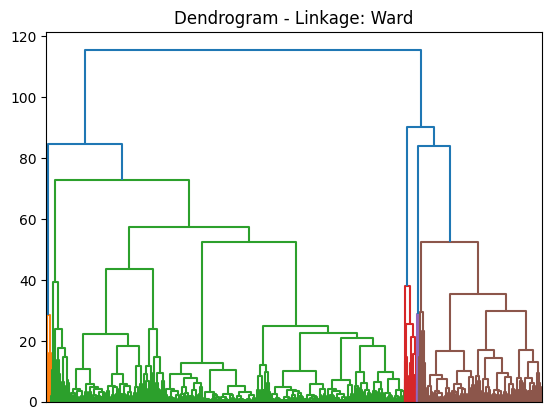

In [ ]:
linkeage_matrix_w = sch.linkage(x_data_scaled, method='ward')
dendrogram_ward = sch.dendrogram(linkeage_matrix_w,
                            labels = np.array(x_data),
                            no_labels = True)
plt.title('Dendrogram - Linkage: Ward')
#plt.xlabel('Customers')
#plt.ylabel('Euclidean distances')
#plt.xticks(rotation=45)
plt.show()

For selecting the number of cluster, at around 80 mark and it appears to cut 9 lines and hence 9 clusters.

In [ ]:
from scipy.cluster.hierarchy import fcluster

# Example: Cut dendrogram at height=15
clusters = fcluster(linkeage_matrix_w, t=80, criterion='distance')
optimal_K_w = len(set(clusters))
print(f"Optimal clusters: {optimal_K_w}")

Optimal clusters: 5


In [ ]:
model_hc_01 = AgglomerativeClustering(n_clusters = optimal_K_w, metric = 'euclidean', linkage = 'ward')
model_hc_01.fit(x_data_scaled)

AgglomerativeClustering(n_clusters=5)

In [ ]:
data_airlines['cluster_hc01'] = model_hc_01.labels_
data_airlines.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster_mk01,cluster_mk02,cluster_mk03,cluster_mk04,cluster_hc01
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,0,7,7,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,0,7,7,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,0,7,7,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0,0,7,7,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1,1,1,4,1


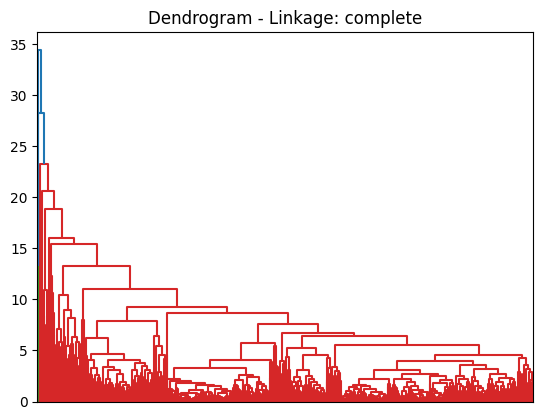

In [ ]:
linkeage_matrix_c = sch.linkage(x_data_scaled, method='complete')
dendrogram_complete = sch.dendrogram(linkeage_matrix_c,
                            labels = np.array(x_data),
                            no_labels = True)

plt.title('Dendrogram - Linkage: complete')
#plt.xlabel('Customers')
#plt.ylabel('Euclidean distances')
#plt.xticks(rotation=45)
plt.show()

Based on the long vertical line and cutting it horizontally

In [ ]:
clusters = fcluster(linkeage_matrix_c, t=15, criterion='distance')
optimal_K_c = len(set(clusters))
print(f"Optimal clusters: {optimal_K_c}")

Optimal clusters: 8


In [ ]:
model_hc_02 = AgglomerativeClustering(n_clusters = optimal_K_c, metric = 'euclidean', linkage = 'complete')
model_hc_02.fit(x_data_scaled)

AgglomerativeClustering(linkage='complete', n_clusters=8)

In [ ]:
data_airlines['cluster_hc02'] = model_hc_02.labels_
data_airlines.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster_mk01,cluster_mk02,cluster_mk03,cluster_mk04,cluster_hc01,cluster_hc02
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,0,7,7,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,0,7,7,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,0,7,7,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0,0,7,7,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1,1,1,4,1,1


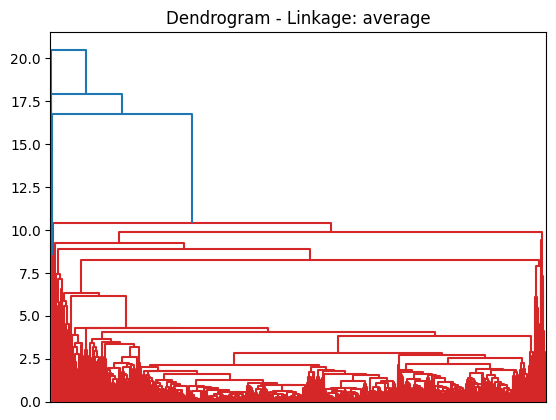

In [ ]:
linkeage_matrix_a = sch.linkage(x_data_scaled, method='average')
dendrogram_average = sch.dendrogram(linkeage_matrix_a,
                            labels = np.array(x_data),
                            no_labels = True)

plt.title('Dendrogram - Linkage: average')
plt.show()

In [ ]:
clusters = fcluster(linkeage_matrix_a, t = 7.5, criterion = 'distance')

optimal_K_a = len(set(clusters))
print(f"Optimal clusters: {optimal_K_a}")

Optimal clusters: 14


In [ ]:
model_hc_03 = AgglomerativeClustering(n_clusters = optimal_K_a, metric = 'euclidean', linkage = 'average')
model_hc_03.fit(x_data_scaled)

AgglomerativeClustering(linkage='average', n_clusters=14)

In [ ]:
data_airlines['cluster_hc03'] = model_hc_03.labels_
data_airlines.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster_mk01,cluster_mk02,cluster_mk03,cluster_mk04,cluster_hc01,cluster_hc02,cluster_hc03
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,0,7,7,0,1,5
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,0,7,7,0,1,5
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,0,7,7,0,1,5
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0,0,7,7,0,1,5
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1,1,1,4,1,1,5


In [ ]:
sil_score_hc_01 = silhouette_score(x_data_scaled, model_hc_01.labels_)
davies_bouldin_score_hc_01 = davies_bouldin_score(x_data_scaled, model_hc_01.labels_)
print('Silhouette Score hc01:', sil_score_hc_01)
print('Davies Bouldin Score h01:', davies_bouldin_score_hc_01)

sil_score_hc_02 = silhouette_score(x_data_scaled, model_hc_02.labels_)
davies_bouldin_score_hc_02 = davies_bouldin_score(x_data_scaled, model_hc_02.labels_)
print('\nSilhouette Score hc02:', sil_score_hc_02)
print('Davies Bouldin Score h02:', davies_bouldin_score_hc_02)

sil_score_hc_03 = silhouette_score(x_data_scaled, model_hc_03.labels_)
davies_bouldin_score_hc_03 = davies_bouldin_score(x_data_scaled, model_hc_03.labels_)
print('\nSilhouette Score hc03:', sil_score_hc_03)
print('Davies Bouldin Score h03:', davies_bouldin_score_hc_03)

Silhouette Score hc01: 0.32701816589484084
Davies Bouldin Score h01: 0.9727462044658646

Silhouette Score hc02: 0.6415249627563502
Davies Bouldin Score h02: 0.8069156490664275

Silhouette Score hc03: 0.6116438751502644
Davies Bouldin Score h03: 0.7278485305045429


In [ ]:
print('Linkeage: Ward')
print(x_data.groupby(model_hc_01.labels_).mean())
award_rates_hc01 = data_airlines.groupby('cluster_hc01')['Award?'].mean()
print('\nAward rate %', award_rates_hc01 * 100)
print(data_airlines.cluster_hc01.value_counts())

Linkeage: Ward
         Balance  Qual_miles  ...  Flight_trans_12  Days_since_enroll
0   50456.873333  177.163509  ...         0.980351        3673.865263
1  132018.774194   31.729839  ...         0.803427        5306.715726
2  148606.020833  393.125000  ...        18.572917        5040.406250
3   68876.581395   23.255814  ...         2.209302        3968.930233
4  129951.388889   65.666667  ...         1.333333        4488.777778

[5 rows x 10 columns]

Award rate % cluster_hc01
0    27.929825
1    58.467742
2    82.291667
3    39.534884
4    50.000000
Name: Award?, dtype: float64
cluster_hc01
0    2850
1     992
2      96
3      43
4      18
Name: count, dtype: int64


In [ ]:
print('Linkeage: Complete')
print(x_data.groupby(model_hc_02.labels_).mean())
award_rates_hc02 = data_airlines.groupby('cluster_hc02')['Award?'].mean()
print('\nAward rate %', award_rates_hc02 * 100)
print(data_airlines.cluster_hc02.value_counts())

Linkeage: Complete
         Balance   Qual_miles  ...  Flight_trans_12  Days_since_enroll
0  131999.500000   347.000000  ...        49.250000        2200.250000
1   67870.323988   104.450156  ...         1.053738        4101.697560
2  138061.400000    78.800000  ...         1.600000        4613.866667
3  973710.307692   746.615385  ...         6.615385        6972.846154
4  102951.000000  8275.866667  ...         2.333333        4737.466667
5   68876.581395    23.255814  ...         2.209302        3968.930233
6  517178.833333    85.333333  ...         4.333333        5337.166667
7  153910.311111   789.644444  ...        21.000000        4354.488889

[8 rows x 10 columns]

Award rate % cluster_hc02
0    100.000000
1     35.929387
2     53.333333
3     84.615385
4     66.666667
5     39.534884
6    100.000000
7     77.777778
Name: Award?, dtype: float64
cluster_hc02
1    3852
7      45
5      43
2      15
4      15
3      13
6      12
0       4
Name: count, dtype: int64


In [ ]:
print('Linkeage: Average')
print(x_data.groupby(model_hc_03.labels_).mean())
award_rates_hc03 = data_airlines.groupby('cluster_hc03')['Award?'].mean()
print('\nAward rate %', award_rates_hc03 * 100)
print(data_airlines.cluster_hc03.value_counts())

Linkeage: Average
         Balance   Qual_miles  ...  Flight_trans_12  Days_since_enroll
0   1.515145e+05   514.775510  ...        21.163265        4374.734694
1   3.602800e+05  5957.000000  ...        15.000000        5846.000000
2   6.712300e+04     0.000000  ...         1.690476        3987.095238
3   1.226280e+05   296.000000  ...        48.000000        2476.000000
4   1.080934e+05   131.333333  ...         1.555556        4876.222222
5   6.696451e+04    63.436368  ...         1.000262        4101.330359
6   3.479100e+05     0.000000  ...         5.714286        5706.571429
7   1.425270e+05  1000.000000  ...        24.000000        3206.000000
8   8.661278e+05   631.176471  ...         4.411765        6321.411765
9   1.601140e+05   500.000000  ...        53.000000        1373.000000
10  7.211320e+04     0.000000  ...         0.600000        4058.400000
11  1.704838e+06     0.000000  ...        23.000000        7283.000000
12  7.375140e+05     0.000000  ...         7.000000        

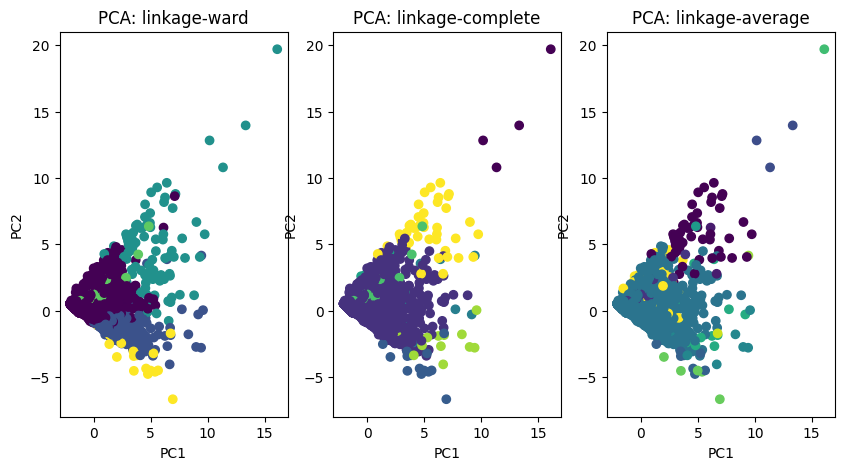

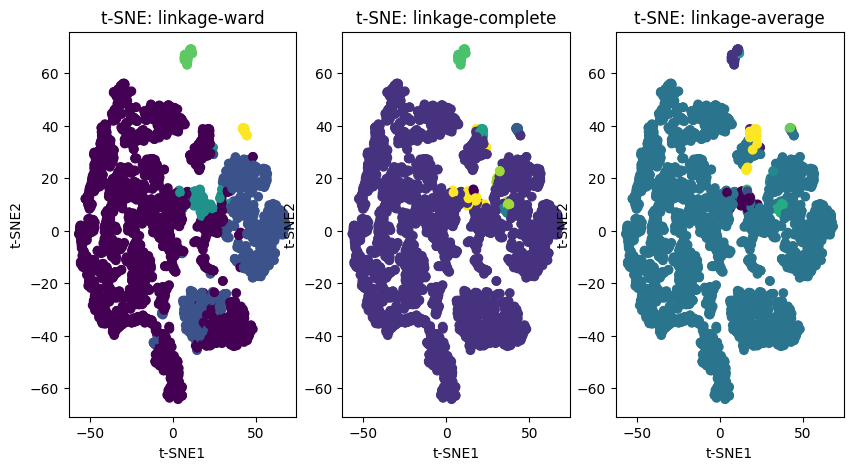

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.scatter(pca_x_data_scaled[:, 0], pca_x_data_scaled[:, 1], c = model_hc_01.labels_, cmap='viridis')
plt.title('PCA: linkage-ward')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.subplot(1, 3, 2)
plt.scatter(pca_x_data_scaled[:, 0], pca_x_data_scaled[:, 1], c = model_hc_02.labels_, cmap='viridis')
plt.title('PCA: linkage-complete')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.subplot(1, 3, 3)
plt.scatter(pca_x_data_scaled[:, 0], pca_x_data_scaled[:, 1], c = model_hc_03.labels_, cmap='viridis')
plt.title('PCA: linkage-average')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.scatter(tsne_x_data_scaled[:, 0], tsne_x_data_scaled[:, 1], c = model_hc_01.labels_, cmap='viridis')
plt.title('t-SNE: linkage-ward')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')

plt.subplot(1, 3, 2)
plt.scatter(tsne_x_data_scaled[:, 0], tsne_x_data_scaled[:, 1], c = model_hc_02.labels_, cmap='viridis')
plt.title('t-SNE: linkage-complete')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')

plt.subplot(1, 3, 3)
plt.scatter(tsne_x_data_scaled[:, 0], tsne_x_data_scaled[:, 1], c = model_hc_03.labels_, cmap='viridis')
plt.title('t-SNE: linkage-average')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')

plt.show()

**DBSCAN - Density-Based Spatial Clustering of Applications with Noise**

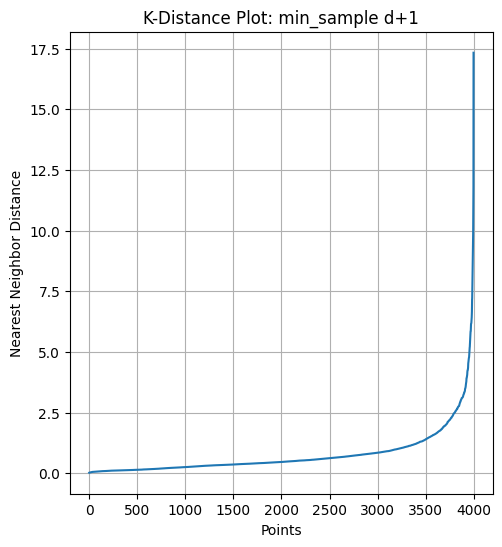

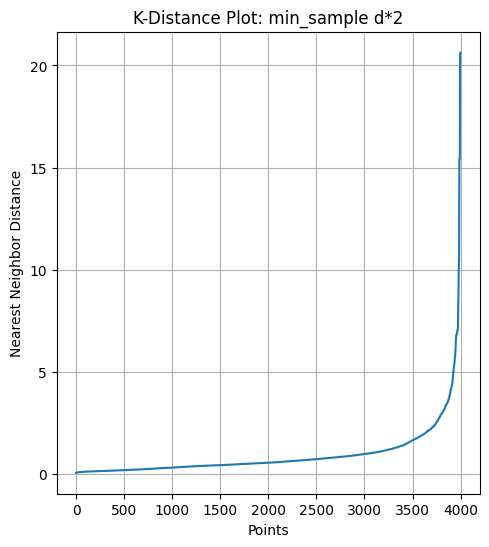

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

neighbors_01 = NearestNeighbors(n_neighbors=11) #d+1
neighbors_02 = NearestNeighbors(n_neighbors=20) #d*2

neighbors_01.fit(x_data_scaled)
neighbors_02.fit(x_data_scaled)

distances_01, indices_01 = neighbors_01.fit(x_data_scaled).kneighbors(x_data_scaled)
distances_01 = np.sort(distances_01[:, -1])

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(distances_01)
plt.xlabel('Points')
plt.ylabel('Nearest Neighbor Distance')
plt.title('K-Distance Plot: min_sample d+1')
plt.grid(True)

distances_02, indices_02 = neighbors_02.fit(x_data_scaled).kneighbors(x_data_scaled)
distances_02 = np.sort(distances_02[:, -1])

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.plot(distances_02)
plt.xlabel('Points')
plt.ylabel('Nearest Neighbor Distance')
plt.title('K-Distance Plot: min_sample d*2')
plt.grid(True)
plt.show()

In [ ]:
model_dbscan_01 = DBSCAN(eps = 2.5, min_samples = 11)
model_dbscan_01.fit(x_data_scaled)

model_dbscan_02 = DBSCAN(eps = 2.5, min_samples = 20)
model_dbscan_02.fit(x_data_scaled)

DBSCAN(eps=2.5, min_samples=20)

In [ ]:
data_airlines['cluster_dbscan01'] = model_dbscan_01.labels_

data_airlines['cluster_dbscan02'] = model_dbscan_02.labels_

data_airlines

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster_mk01,cluster_mk02,cluster_mk03,cluster_mk04,cluster_hc01,cluster_hc02,cluster_hc03,cluster_dbscan01,cluster_dbscan02
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,0,7,7,0,1,5,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,0,7,7,0,1,5,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,0,7,7,0,1,5,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0,0,7,7,0,1,5,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1,1,1,4,1,1,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0,0,2,2,0,1,5,0,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0,0,2,2,0,1,5,0,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0,3,2,8,0,1,5,0,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0,0,2,2,0,1,5,0,0


In [ ]:
sil_score_dbscan_01 = silhouette_score(x_data_scaled, model_dbscan_01.labels_)
davies_bouldin_score_dbscan_01 = davies_bouldin_score(x_data_scaled, model_dbscan_01.labels_)

print('Silhouette Score dbscan01:', sil_score_dbscan_01)
print('Davies Bouldin Score dbscan01:', davies_bouldin_score_dbscan_01)

sil_score_dbscan_02 = silhouette_score(x_data_scaled, model_dbscan_02.labels_)
davies_bouldin_score_dbscan_02 = davies_bouldin_score(x_data_scaled, model_dbscan_02.labels_)

print('\nSilhouette Score dbscan02:', sil_score_dbscan_02)
print('Davies Bouldin Score dbscan02:', davies_bouldin_score_dbscan_02)

Silhouette Score dbscan01: 0.5448972531355666
Davies Bouldin Score dbscan01: 1.6211202987745092

Silhouette Score dbscan02: 0.5773540071899432
Davies Bouldin Score dbscan02: 1.715401637237602


In [ ]:
print('DBSCAN: eps = 2.5, min_samples = 11')
print(x_data.groupby(model_dbscan_01.labels_).mean())
award_rates_dbscan_01 = data_airlines.groupby('cluster_dbscan01')['Award?'].mean()
data_airlines.cluster_dbscan01.value_counts()
print('\nAward rate %', award_rates_dbscan_01 * 100)

print('\nDBSCAN: eps = 2.5, min_samples = 20')
print(data_airlines.groupby(model_dbscan_02.labels_).mean())
data_airlines.cluster_dbscan02.value_counts()
award_rates_dbscan_02 = data_airlines.groupby('cluster_dbscan02')['Award?'].mean()
print('\nAward rate %', award_rates_dbscan_02 * 100)

DBSCAN: eps = 2.5, min_samples = 11
          Balance   Qual_miles  ...  Flight_trans_12  Days_since_enroll
-1  284313.601770  1748.265487  ...        12.407080        4919.132743
 0   67736.587409    98.532778  ...         1.030177        4093.758065
 1   39644.434783     0.000000  ...         0.782609        3846.304348
 2   62116.333333     0.000000  ...        16.833333        5942.000000
 3   41562.307692     0.000000  ...         0.923077        4133.384615

[5 rows x 10 columns]

Award rate % cluster_dbscan01
-1     83.185841
 0     35.639958
 1     30.434783
 2    100.000000
 3     30.769231
Name: Award?, dtype: float64

DBSCAN: eps = 2.5, min_samples = 20
            ID#        Balance  ...  cluster_dbscan01  cluster_dbscan02
-1  1676.438272  247051.203704  ...         -0.382716              -1.0
 0  2027.325380   66438.802307  ...          0.000000               0.0
 1  2324.391304   39644.434783  ...          1.000000               1.0

[3 rows x 21 columns]

Award rate % cl

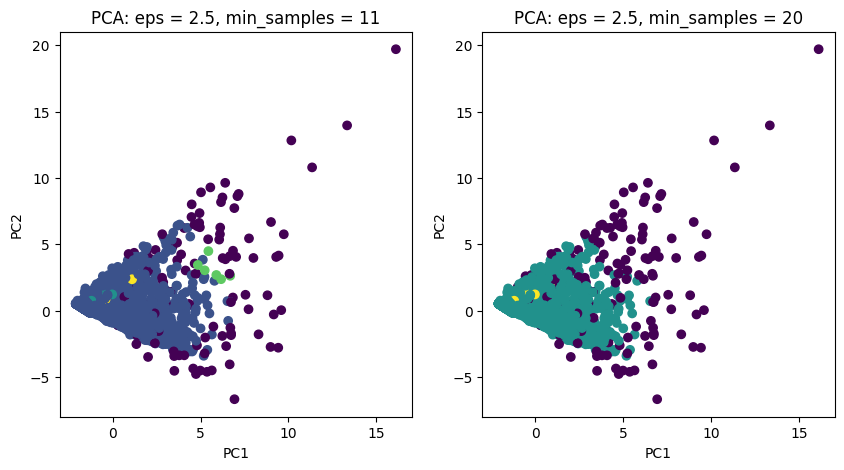

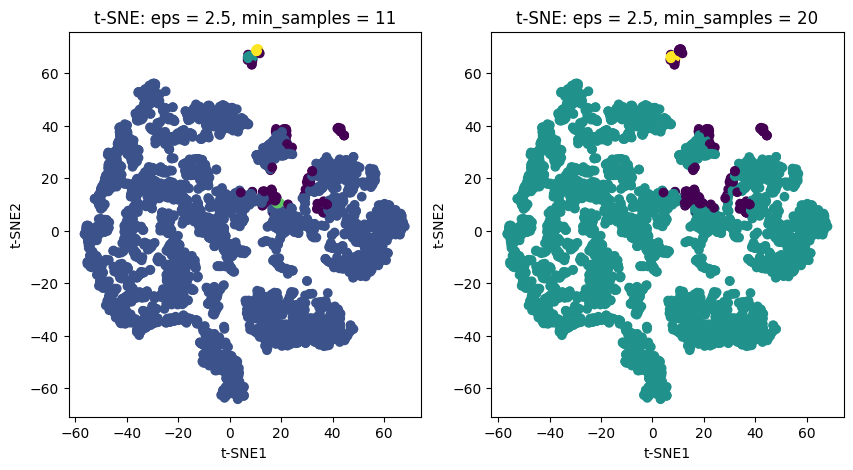

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(pca_x_data_scaled[:, 0], pca_x_data_scaled[:, 1], c = model_dbscan_01.labels_, cmap='viridis')
plt.title('PCA: eps = 2.5, min_samples = 11')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.subplot(1, 2, 2)
plt.scatter(pca_x_data_scaled[:, 0], pca_x_data_scaled[:, 1], c = model_dbscan_02.labels_, cmap='viridis')
plt.title('PCA: eps = 2.5, min_samples = 20')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(tsne_x_data_scaled[:, 0], tsne_x_data_scaled[:, 1], c = model_dbscan_01.labels_, cmap='viridis')
plt.title('t-SNE: eps = 2.5, min_samples = 11')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')

plt.subplot(1, 2, 2)
plt.scatter(tsne_x_data_scaled[:, 0], tsne_x_data_scaled[:, 1], c = model_dbscan_02.labels_, cmap='viridis')
plt.title('t-SNE: eps = 2.5, min_samples = 20')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')

plt.show()